## $In\ the\ Name\ of\ God$

### $Narges\ Gholami$ 810198447

#### CA5 phase 2

<div style="direction:rtl"> اسم پروژه: پیاده سازی شبکه عصبی با استفاده از keras و TensorFlow</div>

<div style="direction:rtl"> هدف پروژه: از آن جایی که استفاده از شبکه های عصبی روز به روز محبوب تر می شود فریم ورک های بسیار قدرتمندی برای سهولت در ایجاد شبکه های عصبی بسیار پیچیده و با کارایی بسیار بالا عرضه شده
است. در این پروژه قصد داریم با کتابخانه TensorFlow و با استفاده از رابط سطح بالای Keras برخی از مسائل مربوط به شبکه
های عصبی را بررسی نماییم.</div>

<div style="direction:rtl"> توضیح کلی پروژه: این پروژه در 4 فاز پیاده سازی می شود. در فاز اول به بررسی و پیش پردازش داده ها می پردازیم. در فاز دوم طراحی شبکه عصبی انجام می شود و در فاز سوم طبقه بندی داده ها انجام می پذیرد و تاثیر هایپرپارامترهای مختلف بررسی می گردد و در فاز اخر داده ها با بعد کاهش یافته ترسیم می شوند.</div>

#### $import\ libraries$

In [1]:
import numpy as np
from tensorflow.keras import *
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report 

### $phase\ 1$

 $part\ 1$

In [2]:
def readData(data_generator, file_path, mode = 'training'):
    return data_generator.flow_from_directory(file_path, batch_size = 32, color_mode = "grayscale", target_size = (100, 100), subset= mode)  

<div style="direction:rtl"> با قرار دادن color mode برابر grayscale تصاویر gray scale می شوند.</div>

$part\ 2$


In [3]:
dataGenerator1 = preprocessing.image.ImageDataGenerator(rescale=1./255)
trainData = readData(dataGenerator1, "dataset/dataset/train", "training")

Found 1945 images belonging to 4 classes.


<div style="direction:rtl"> همان طور که مشاهده می شود 1945 تصویر در پوشه ترین وجود دارد که متعلق به 4 کلاس است.</div>
<div style="direction:rtl"> در این تابع برای قسمت پنجم که باید برای داده ی ترین یک validation part نیز داشته باشیم نسبت تعیین می کنیم. </div>

In [3]:
dataGenerator2 = preprocessing.image.ImageDataGenerator(rescale=1./255)
testData = readData(dataGenerator2, "dataset/dataset/test")  

Found 833 images belonging to 4 classes.


<div style="direction:rtl"> همان طور که مشاهده می شود 833 تصویر در پوشه تست وجود دارد که متعلق به 4 کلاس است.این تصاویر به هدف تست کردن شبکه عصبی لود می شوند.</div>

$part\ 3$

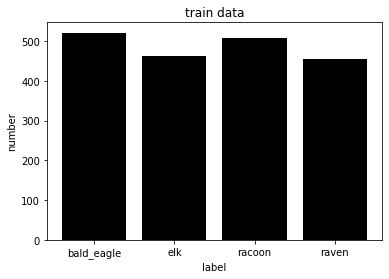

[521, 462, 507, 455]

In [ ]:
trianCount = [0]*4
trianCount[0] = np.count_nonzero(trainData.classes == 0)
trianCount[1] = np.count_nonzero(trainData.classes == 1)
trianCount[2] = np.count_nonzero(trainData.classes == 2)
trianCount[3] = np.count_nonzero(trainData.classes == 3)
plt.bar(trainData.class_indices.keys(), trianCount, align='center', color= 'black')
plt.ylabel("number")
plt.xlabel("label")
plt.title("train data")
plt.show()
trianCount

<div style="direction:rtl"> در این قسمت تعداد تصاویر در هر کلاس محاسبه شده و پلات میشوند. نمودار بالا مربوط به داده ی ترین میباشد.</div>

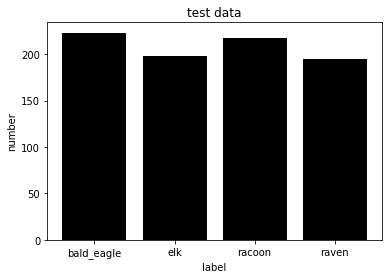

[223, 198, 217, 195]

In [ ]:
testCount = [0]*4
testCount[0] = np.count_nonzero(testData.classes == 0)
testCount[1] = np.count_nonzero(testData.classes == 1)
testCount[2] = np.count_nonzero(testData.classes == 2)
testCount[3] = np.count_nonzero(testData.classes == 3)
plt.bar(testData.class_indices.keys(), testCount, align='center', color= 'black')
plt.ylabel("number")
plt.xlabel("label")
plt.title("test data")
plt.show()
testCount

<div style="direction:rtl">  نمودار بالا مربوط به داده ی تست میباشد.</div>

$part\ 4$

Text(0.5, 1.0, 'racoon')

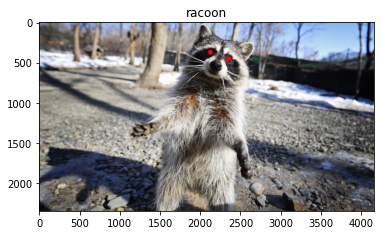

In [ ]:
img1 = mpimg.imread("dataset/dataset/train/racoon/00a4c3339602e247f1.jpeg")
plt.figure()
plt.imshow(img1)
plt.title("racoon")

Text(0.5, 1.0, 'elk')

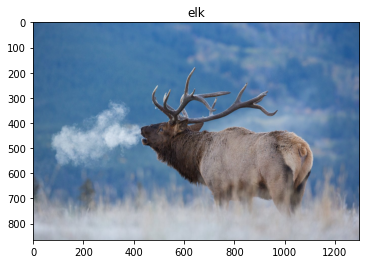

In [ ]:
img2 = mpimg.imread("dataset/dataset/train/elk/00b36f2e67e9d96911.jpg")
imgplot = plt.imshow(img2)
plt.title("elk")

Text(0.5, 1.0, 'bald eagle')

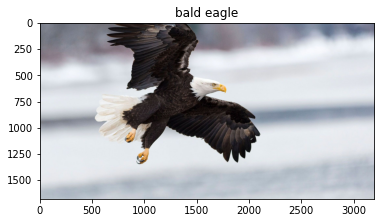

In [ ]:
img3 = mpimg.imread("dataset/dataset/train/bald_eagle/0c26b6ddb61fd8e8d9.jpg")
imgplot = plt.imshow(img3)
plt.title("bald eagle")

Text(0.5, 1.0, 'raven')

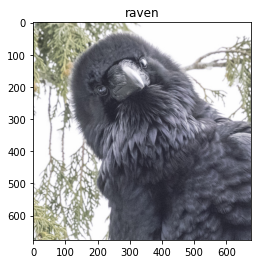

In [ ]:
img4 = mpimg.imread("dataset/dataset/train/raven/1a65308d6d49c6fcb4.jpg")
imgplot = plt.imshow(img4)
plt.title("raven")

<div style="direction:rtl"> در این قسمت از هر کلاس یک تصویر انتخاب شد و توسط تابع imshow  نمایش داده شد.</div>

$part\ 5$

In [4]:
dataGenerator1 = preprocessing.image.ImageDataGenerator(rescale=1./255, validation_split=0.3)
trainData = readData(dataGenerator1, "dataset/dataset/train", "training")
trainDataValidation = readData(dataGenerator1, "dataset/dataset/train", "validation")

Found 1363 images belonging to 4 classes.
Found 582 images belonging to 4 classes.


<div style="direction:rtl"> برای داده ی ترین مقدار validation split برابر 0.3 قرار داده شد. این عدد یک مقدار معقول است که نه باعث overfitting میشود و نه باعث underfitting میشود.</div>



$part\ 6$

In [ ]:
one_hot_encode = to_categorical(trainData.labels)
print(one_hot_encode)

[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]


### $phase\ 2$

In [105]:
input = layers.Input(shape=(100, 100, 1))
output = layers.Flatten()(input)
output = layers.Dense(2048, activation = 'relu')(output)
output = layers.Dense(512, activation = 'relu')(output)
output = layers.Dense(4, activation= "softmax")(output)
firstModel = models.Model(inputs=input, outputs=output) 

opt = optimizers.SGD(learning_rate = 0.01)
firstModel.compile(optimizer = opt, loss = "categorical_crossentropy",metrics=["accuracy"])  
firstModel.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 100, 100, 1)]     0         
                                                                 
 flatten_5 (Flatten)         (None, 10000)             0         
                                                                 
 dense_17 (Dense)            (None, 2048)              20482048  
                                                                 
 dense_18 (Dense)            (None, 512)               1049088   
                                                                 
 dense_19 (Dense)            (None, 4)                 2052      
                                                                 
Total params: 21,533,188
Trainable params: 21,533,188
Non-trainable params: 0
_________________________________________________________________


<div style="direction:rtl"> در این مرحله با استفاده از دستور summary تعداد نورون های هر لایه همان طور که در بالا نوشته شده بود چاپ می شود.</div>

In [106]:
h = firstModel.fit(trainData, validation_data= trainDataValidation, epochs=20,  batch_size= 32)

Epoch 1/20
32/61 [==============>...............] - ETA: 18s - loss: 1.5479 - accuracy: 0.3235

C:\Users\N.GH\AppData\Local\Programs\Python\Python39\lib\site-packages\PIL\Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


61/61 [==============================] - 63s 1s/step - loss: 1.4173 - accuracy: 0.3702 - val_loss: 1.1273 - val_accuracy: 0.5704
Epoch 2/20
61/61 [==============================] - 64s 1s/step - loss: 1.1670 - accuracy: 0.4833 - val_loss: 1.2354 - val_accuracy: 0.4725
Epoch 3/20
61/61 [==============================] - 71s 1s/step - loss: 1.1049 - accuracy: 0.5362 - val_loss: 0.9803 - val_accuracy: 0.5808
Epoch 4/20
61/61 [==============================] - 72s 1s/step - loss: 1.0561 - accuracy: 0.5573 - val_loss: 1.0430 - val_accuracy: 0.5825
Epoch 5/20
61/61 [==============================] - 72s 1s/step - loss: 0.9995 - accuracy: 0.6067 - val_loss: 0.8715 - val_accuracy: 0.6907
Epoch 6/20
61/61 [==============================] - 71s 1s/step - loss: 0.9369 - accuracy: 0.6267 - val_loss: 0.8756 - val_accuracy: 0.6529
Epoch 7/20
61/61 [==============================] - 71s 1s/step - loss: 0.9006 - accuracy: 0.6447 - val_loss: 0.8925 - val_accuracy: 0.6289
Epoch 8/20
61/61 [=============

In [5]:
def printMetrics(model):
    dataGenerator1 = preprocessing.image.ImageDataGenerator(rescale=1./255, validation_split=0.3)
    data = dataGenerator1.flow_from_directory(
    "dataset/dataset/train",
    target_size = (100,100),
    color_mode = "grayscale",
    batch_size=32,
    shuffle = False, subset= "validation")
    
    trueOutputs = model.predict(data)
    print(classification_report(np.argmax(np.array(trueOutputs), axis = 1),\
        np.array(data.classes)))

In [108]:
printMetrics(firstModel)

Found 582 images belonging to 4 classes.


C:\Users\N.GH\AppData\Local\Programs\Python\Python39\lib\site-packages\PIL\Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


              precision    recall  f1-score   support

           0       1.00      0.42      0.59       372
           1       0.16      1.00      0.27        22
           2       0.69      0.98      0.81       107
           3       0.58      0.98      0.73        81

    accuracy                           0.62       582
   macro avg       0.61      0.84      0.60       582
weighted avg       0.85      0.62      0.64       582



### $phase\ 3$

#### $part\ 1 - optimizer$

<div style="direction:rtl"> Momentum اصطلاحی است که در الگوریتم gradient descent  استفاده می شود.Gradient Descent یک الگوریتم بهینه‌سازی است که با یافتن جهت تندترین شیب در وضعیت فعلی کار می‌کند و با حرکت به سمت آن، وضعیت آن را به‌روزرسانی می‌کند. در نتیجه، در هر مرحله تضمین می‌شود که مقدار تابعی که باید به حداقل برسد در هر مرحله کاهش می‌یابد. مشکل این است که این جهت می تواند در برخی از نقاط تابع به شدت تغییر کند در حالی که بهترین مسیر برای رفتن معمولاً شامل پیچ های زیادی نیست. بنابراین برای ما مطلوب است که الگوریتم را برای مدتی قبل از اینکه جهت خود را تغییر دهد حفظ کنیم. برای انجام این کار، momentum معرفی شده است. روشی برای تفکر در این مورد این است که تصور کنید سنگی از تپه در حال غلتیدن است تا زمانی که در یک منطقه مسطح (حداقل محلی) متوقف شود. اگر سنگی که از یک تپه غلت می‌زند از نقطه‌ای عبور کند که شیب‌دارترین جهت برای یک لحظه تغییر کند، انتظار نداریم که مسیر خود را کاملاً تغییر دهد (زیرا حرکت فیزیکی آن باعث ادامه حرکت آن می‌شود). اما اگر جهت شیب به طور کامل تغییر کند، سنگ به تدریج جهت خود را به سمت تندترین فرود تغییر می دهد.</div>



In [104]:
input = layers.Input(shape=(100, 100, 1))
output = layers.Flatten()(input)
output = layers.Dense(4096, activation = 'relu')(output)
output = layers.Dense(2048, activation = 'relu')(output)
output = layers.Dense(512, activation = 'relu')(output)
output = layers.Dense(4 , activation= "softmax")(output)
optModel1 = models.Model(inputs=input, outputs=output) 

opt = optimizers.SGD(learning_rate = 0.01, momentum=0.5)
optModel1.compile(optimizer = opt, loss = "categorical_crossentropy", metrics=['accuracy'])  
h = optModel1.fit(trainData, validation_data=trainDataValidation, epochs=20,  batch_size= 32)
printMetrics(optModel1)

Epoch 1/20
21/61 [=========>....................] - ETA: 18s - loss: 1.5570 - accuracy: 0.3429

C:\Users\N.GH\AppData\Local\Programs\Python\Python39\lib\site-packages\PIL\Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


61/61 [==============================] - 35s 578ms/step - loss: 1.3705 - accuracy: 0.3784 - val_loss: 1.3249 - val_accuracy: 0.4296
Epoch 2/20
61/61 [==============================] - 37s 613ms/step - loss: 1.1504 - accuracy: 0.4951 - val_loss: 1.1161 - val_accuracy: 0.4742
Epoch 3/20
61/61 [==============================] - 31s 511ms/step - loss: 1.0667 - accuracy: 0.5398 - val_loss: 1.0326 - val_accuracy: 0.5464
Epoch 4/20
61/61 [==============================] - 31s 508ms/step - loss: 0.9873 - accuracy: 0.5784 - val_loss: 0.8636 - val_accuracy: 0.6615
Epoch 5/20
61/61 [==============================] - 31s 505ms/step - loss: 0.9138 - accuracy: 0.6262 - val_loss: 0.8004 - val_accuracy: 0.6959
Epoch 6/20
61/61 [==============================] - 31s 505ms/step - loss: 0.8791 - accuracy: 0.6550 - val_loss: 0.8008 - val_accuracy: 0.6409
Epoch 7/20
61/61 [==============================] - 31s 515ms/step - loss: 0.8414 - accuracy: 0.6638 - val_loss: 0.6886 - val_accuracy: 0.7405
Epoch 8/20

In [110]:
input = layers.Input(shape=(100, 100, 1))
output = layers.Flatten()(input)
output = layers.Dense(4096, activation = 'relu')(output)
output = layers.Dense(2048, activation = 'relu')(output)
output = layers.Dense(512, activation = 'relu')(output)
output = layers.Dense(4 , activation= "softmax")(output)
momentumModel2 = models.Model(inputs=input, outputs=output) 

opt = optimizers.SGD(learning_rate = 0.01, momentum=0.9)
momentumModel2.compile(optimizer = opt, loss = "categorical_crossentropy", metrics=['accuracy'])  
h = momentumModel2.fit(trainData, validation_data=trainDataValidation, epochs=20,  batch_size= 32)
printMetrics(momentumModel2)

Epoch 1/20
61/61 [==============================] - 61s 998ms/step - loss: 1.4237 - accuracy: 0.3496 - val_loss: 1.2280 - val_accuracy: 0.4777
Epoch 2/20
61/61 [==============================] - 76s 1s/step - loss: 1.1825 - accuracy: 0.4494 - val_loss: 1.0795 - val_accuracy: 0.5258
Epoch 3/20
61/61 [==============================] - 76s 1s/step - loss: 1.1566 - accuracy: 0.4643 - val_loss: 1.0866 - val_accuracy: 0.5241
Epoch 4/20
61/61 [==============================] - 76s 1s/step - loss: 1.0913 - accuracy: 0.5054 - val_loss: 0.9301 - val_accuracy: 0.5825
Epoch 5/20
61/61 [==============================] - 75s 1s/step - loss: 1.1090 - accuracy: 0.5126 - val_loss: 0.9072 - val_accuracy: 0.6237
Epoch 6/20
61/61 [==============================] - 75s 1s/step - loss: 1.0576 - accuracy: 0.5306 - val_loss: 1.0525 - val_accuracy: 0.5378
Epoch 7/20
61/61 [==============================] - 75s 1s/step - loss: 1.0133 - accuracy: 0.5630 - val_loss: 1.2995 - val_accuracy: 0.4416
Epoch 8/20
61/61 

<div style="direction:rtl"> momentum یا SGD  روشی است که به ما کمک می کند تا گرادیان را تسریع کنیم. در واقع، تکانه هر مرحله از فرآیند یادگیری را به مرحله قبلی خود وابسته می کند. اگر momentum و نرخ یادگیری را برابر یک مقدار بزرگ قرار دهیم، گام های بزرگ تری خواهیم داشت و بر اساس وابستگی که در بالا به آن اشاره کردیم، مراحل بعدی بزرگتر و بزرگتر می شوند. در نتیجه، وزن ها به روش صحیح به روز نمی شوند و هرگز به مقادیر بهینه نمی رسند. بنابراین، تکانه بزرگ لزوماً منجر به دقت بالاتر نمی شود.</div>

In [10]:
input = layers.Input(shape=(100, 100, 1))
output = layers.Flatten()(input)
output = layers.Dense(4096, activation = 'relu')(output)
output = layers.Dense(2048, activation = 'relu')(output)
output = layers.Dense(512, activation = 'relu')(output)
output = layers.Dense(4 , activation= "softmax")(output)
AdamModel = models.Model(inputs=input, outputs=output) 

opt = optimizers.Adam(learning_rate=0.001)
AdamModel.compile(optimizer = opt, loss = "categorical_crossentropy", metrics=['accuracy'])  
h = AdamModel.fit(trainData, validation_data=trainDataValidation, epochs=20,  batch_size= 32)
printMetrics(AdamModel)

Epoch 1/20


C:\Users\N.GH\AppData\Local\Programs\Python\Python39\lib\site-packages\PIL\Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


43/43 [==============================] - 47s 1s/step - loss: 5.7659 - accuracy: 0.3037 - val_loss: 1.2846 - val_accuracy: 0.3763
Epoch 2/20
43/43 [==============================] - 51s 1s/step - loss: 1.2356 - accuracy: 0.4380 - val_loss: 1.1784 - val_accuracy: 0.4364
Epoch 3/20
43/43 [==============================] - 43s 1s/step - loss: 1.1774 - accuracy: 0.4453 - val_loss: 1.2180 - val_accuracy: 0.4107
Epoch 4/20
43/43 [==============================] - 40s 927ms/step - loss: 1.1661 - accuracy: 0.4563 - val_loss: 1.2515 - val_accuracy: 0.4158
Epoch 5/20
43/43 [==============================] - 34s 790ms/step - loss: 1.1704 - accuracy: 0.4505 - val_loss: 1.1480 - val_accuracy: 0.4897
Epoch 6/20
43/43 [==============================] - 29s 688ms/step - loss: 1.1214 - accuracy: 0.4872 - val_loss: 1.1197 - val_accuracy: 0.4914
Epoch 7/20
43/43 [==============================] - 26s 615ms/step - loss: 1.0629 - accuracy: 0.5268 - val_loss: 1.0415 - val_accuracy: 0.5378
Epoch 8/20
43/43 [=

#### $part\ 2 -epoch$

In [47]:
input = layers.Input(shape=(100, 100, 1))
output = layers.Flatten()(input)
output = layers.Dense(4096, activation = 'relu')(output)
output = layers.Dense(2048, activation = 'relu')(output)
output = layers.Dense(512, activation = 'relu')(output)
output = layers.Dense(4 , activation= "softmax")(output)
epochModel = models.Model(inputs=input, outputs=output) 

opt = optimizers.Adam(learning_rate=0.001)
epochModel.compile(optimizer = opt, loss = "categorical_crossentropy", metrics=['accuracy'])  
h = epochModel.fit(trainData, validation_data=trainDataValidation, epochs=80,  batch_size= 32)
printMetrics(epochModel)

Epoch 1/80
 4/43 [=>............................] - ETA: 14s - loss: 29.6481 - accuracy: 0.2500

C:\Users\N.GH\AppData\Local\Programs\Python\Python39\lib\site-packages\PIL\Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


43/43 [==============================] - 33s 772ms/step - loss: 5.8739 - accuracy: 0.2927 - val_loss: 1.3284 - val_accuracy: 0.3797
Epoch 2/80
43/43 [==============================] - 48s 1s/step - loss: 1.2771 - accuracy: 0.3866 - val_loss: 1.2821 - val_accuracy: 0.3694
Epoch 3/80
43/43 [==============================] - 55s 1s/step - loss: 1.2073 - accuracy: 0.4417 - val_loss: 1.1486 - val_accuracy: 0.4777
Epoch 4/80
43/43 [==============================] - 48s 1s/step - loss: 1.1499 - accuracy: 0.4659 - val_loss: 1.1152 - val_accuracy: 0.4828
Epoch 5/80
43/43 [==============================] - 48s 1s/step - loss: 1.1152 - accuracy: 0.4908 - val_loss: 1.1302 - val_accuracy: 0.4777
Epoch 6/80
43/43 [==============================] - 51s 1s/step - loss: 1.1004 - accuracy: 0.5026 - val_loss: 1.1797 - val_accuracy: 0.4313
Epoch 7/80
43/43 [==============================] - 50s 1s/step - loss: 1.0662 - accuracy: 0.5194 - val_loss: 1.0916 - val_accuracy: 0.5189
Epoch 8/80
43/43 [==========

<div style="direction:rtl"> </div>

<div style="direction:rtl"> در هر epoch وزن‌ها بارها آپدیت می‌شوند و همه‌ی دیتا چک می‌شود. اگر ما بخواهیم بازدهی خوبی روی داده‌های خود بگیریم باید بارها training data را به عنوان ورودی بدهیم.

 علاوه بر این، مشخصا gradient descent پس از اولین دوره به مینیموم گلوبال یا محلی خود نمی‌رسد. پس یک بار آموزش دادن ممکن است منجر به underfitting  شود. پس در نتیجه ما عملا در مسائل از چندین epoch استفاده می کنیم. 
</div>

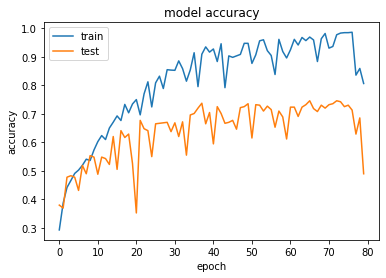

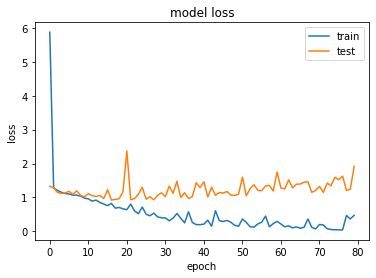

In [48]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()
  
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

<div style="direction:rtl">همان طور که مشاهده میشود رفته رفته دقت داده ترین و تست بیشتر شده است ولی از یک جایی به بعد دقت داده تست و ترین کمتر میشود و برای loss برعکس همین اتفاق افتاده، یعنی برای داده ی ترین و تست رفته رفته مقدارش کاهش یافته سپس افزایش یافته است.این دو تاییدی بر این موضوع هستند که overfitting اتفاق افتاده است. </div>

<div style="direction:rtl"> در این قسمت برای جلوگیری از overfitting از روش early stopping کمک می گیریم. در این جهت یک معیار تحت عنوان monitor  تعریف میکنیم. به این معیار گفته می شود که اگر پیشرفت داده ی تو با توجه به معیار مثلا دقت بعد از مدتی افزایش خاصی نداشت از ادامه فرآیند یادگیری شبکه عصبی منصرف شو زیرا از یک جایی به بعد منجر به overfitting میشود. </div>

<div style="direction:rtl">لایه های Dropout می توانند همچنین یک راه آسان و موثر برای جلوگیری از overfitting بیش از حد در مدل‌های شما باشند. یک لایه dropout به طور تصادفی برخی از اتصالات بین لایه ها را حذف می کند. این به جلوگیری از overfitting کمک می‌کند، زیرا اگر یک اتصال قطع شود، خوشبختانه شبکه مجبور به اتصال می‌شود. پیاده‌سازی این کار در keras آسان می‌باشد. </div>

<div style="direction:rtl"> اگر تعداد epoch ها را برابر یک مقدار خیلی بزرگ قرار دهیم، ممکن است منجر به overfitting  شود، زیرا ما داده ها را چندین بار آموزش می دهیم و مدل ما شروع به مدل سازی نویزهای موجود در داده های ما می کند و دقت داده های تست کاهش می یابد.</div>

In [8]:
input = layers.Input(shape=(100, 100, 1))
output = layers.Flatten()(input)
output = layers.Dense(4096, activation = 'relu')(output)
output = layers.Dense(2048, activation = 'relu')(output)
output = layers.Dense(512, activation = 'relu')(output)
output = layers.Dense(4 , activation= "softmax")(output)
epochModel = models.Model(inputs=input, outputs=output) 


opt = optimizers.Adam(learning_rate=0.001)
epochModel.compile(optimizer = opt, loss = "categorical_crossentropy", metrics=['accuracy'])  
callback = callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
h = epochModel.fit(trainData, validation_data=trainDataValidation, epochs=80,  batch_size= 32, callbacks=[callback])

C:\Users\N.GH\AppData\Local\Programs\Python\Python39\lib\site-packages\PIL\Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 1/80
43/43 [==============================] - 52s 1s/step - loss: 6.6539 - accuracy: 0.2781 - val_loss: 1.3788 - val_accuracy: 0.2629
Epoch 2/80
43/43 [==============================] - 59s 1s/step - loss: 1.2960 - accuracy: 0.4035 - val_loss: 1.2217 - val_accuracy: 0.4364
Epoch 3/80
43/43 [==============================] - 58s 1s/step - loss: 1.2207 - accuracy: 0.4439 - val_loss: 1.1915 - val_accuracy: 0.4313
Epoch 4/80
43/43 [==============================] - 59s 1s/step - loss: 1.1629 - accuracy: 0.4637 - val_loss: 1.1681 - val_accuracy: 0.4742
Epoch 5/80
43/43 [==============================] - 57s 1s/step - loss: 1.1475 - accuracy: 0.4769 - val_loss: 1.2207 - val_accuracy: 0.4639
Epoch 6/80
43/43 [==============================] - 59s 1s/step - loss: 1.1038 - accuracy: 0.4952 - val_loss: 1.0666 - val_accuracy: 0.5378
Epoch 7/80
43/43 [==============================] - 59s 1s/step - loss: 1.0908 - accuracy: 0.5077 - val_loss: 1.1166 - val_accuracy: 0.4897
Epoch 8/80
43/43 [==

<div style="direction:rtl"> early stopping اعمال شد</div>

#### $part\ 3 - loss\ function$

In [45]:
input = layers.Input(shape=(100, 100, 1))
output = layers.Flatten()(input)
output = layers.Dense(4096, activation = 'relu')(output)
output = layers.Dense(2048, activation = 'relu')(output)
output = layers.Dense(512, activation = 'relu')(output)
output = layers.Dense(4 , activation= "softmax")(output)
lossModel = models.Model(inputs=input, outputs=output) 

opt = optimizers.Adam(learning_rate=0.001)
lossModel.compile(optimizer = opt, loss = "mse", metrics=['accuracy'])  
h = lossModel.fit(trainData, validation_data=trainDataValidation, epochs=20,  batch_size= 32)
printMetrics(lossModel)

Epoch 1/20
 2/43 [>.............................] - ETA: 12s - loss: 0.2976 - accuracy: 0.2344

C:\Users\N.GH\AppData\Local\Programs\Python\Python39\lib\site-packages\PIL\Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


43/43 [==============================] - 24s 554ms/step - loss: 0.3786 - accuracy: 0.2348 - val_loss: 0.3814 - val_accuracy: 0.2371
Epoch 2/20
43/43 [==============================] - 24s 552ms/step - loss: 0.3811 - accuracy: 0.2377 - val_loss: 0.3814 - val_accuracy: 0.2371
Epoch 3/20
43/43 [==============================] - 25s 577ms/step - loss: 0.3811 - accuracy: 0.2377 - val_loss: 0.3814 - val_accuracy: 0.2371
Epoch 4/20
43/43 [==============================] - 25s 591ms/step - loss: 0.3811 - accuracy: 0.2377 - val_loss: 0.3814 - val_accuracy: 0.2371
Epoch 5/20
43/43 [==============================] - 25s 581ms/step - loss: 0.3811 - accuracy: 0.2377 - val_loss: 0.3814 - val_accuracy: 0.2371
Epoch 6/20
43/43 [==============================] - 25s 591ms/step - loss: 0.3811 - accuracy: 0.2377 - val_loss: 0.3814 - val_accuracy: 0.2371
Epoch 7/20
43/43 [==============================] - 26s 599ms/step - loss: 0.3811 - accuracy: 0.2377 - val_loss: 0.3814 - val_accuracy: 0.2371
Epoch 8/20

C:\Users\N.GH\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\N.GH\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\N.GH\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

<div style="direction:rtl"> این دقت نشان دهنده این است که شبکه عصبیی که در آن از تابع loss function کراس اینتروپی استفاده شده است بهتر از شبکه عصبی با تابع mse میباشد.</div>

<div style="direction:rtl">در این قسمت دو دلیل برای خوب نبودن تابع loss function mse بیان می‌کنیم.

اولا، وقتی از MSE استفاده می کنیم، به این معنی است که فرض می کنیم داده های اساسی از یک توزیع نرمال تولید شده اند. در حالی که در واقع، مجموعه داده های ما را می توان به چهار دسته طبقه بندی کرد. در نتیجه توزیع نرمال نیست.

ثانیاً، تابع MSE برای طبقه بندی غیر محدب است. به عبارت دیگر، اگر یک مدل طبقه بندی با تابع ضرر MSE آموزش داده شود، تضمینی برای به حداقل رساندن تابع ضرر وجود ندارد. این به این دلیل است که تابع MSE انتظار دارد ورودی های با ارزش واقعی را در محدوده منفی بینهایت تا مثبت بینهایت مشاهده کند، در حالی که طبقه بندی احتمالات خروجی را در محدوده (0،1) از طریق تابع فعال سازی مدل می کند.

زمانی که ما رگرسیون خطی انجام می دهیم  MSE انتخاب خوبی برای تابع هزینه است.  در صورتی که ما از نحوه توزیع داده ها خبر نداشته باشیم این که  فرض اینکه توزیع نرمال یا گاوسی است، کاملاً منطقی است.
 </div>

#### $part\ 4 - regularization$

In [18]:
input = layers.Input(shape=(100, 100, 1))
output = layers.Flatten()(input)
output = layers.Dense(4096, activation = 'relu', kernel_regularizer=regularizers.l2(0.0001))(output)
output = layers.Dense(2048, activation = 'relu', kernel_regularizer=regularizers.l2(0.0001))(output)
output = layers.Dense(512, activation = 'relu', kernel_regularizer=regularizers.l2(0.0001))(output)
output = layers.Dense(4 , activation= "softmax", kernel_regularizer=regularizers.l2(0.0001))(output)
dModel = models.Model(inputs=input, outputs=output) 

opt = optimizers.Adam(learning_rate=0.001)
dModel.compile(optimizer = opt, loss = "categorical_crossentropy", metrics=['accuracy'])  
h = dModel.fit(trainData, validation_data=trainDataValidation, epochs=20,  batch_size= 32)
printMetrics(dModel)

Epoch 1/20
20/43 [============>.................] - ETA: 13s - loss: 13.0597 - accuracy: 0.2172

C:\Users\N.GH\AppData\Local\Programs\Python\Python39\lib\site-packages\PIL\Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


43/43 [==============================] - 33s 768ms/step - loss: 7.3583 - accuracy: 0.2649 - val_loss: 2.1420 - val_accuracy: 0.3849
Epoch 2/20
43/43 [==============================] - 32s 745ms/step - loss: 2.0088 - accuracy: 0.4109 - val_loss: 1.8670 - val_accuracy: 0.4330
Epoch 3/20
43/43 [==============================] - 30s 710ms/step - loss: 1.8638 - accuracy: 0.4351 - val_loss: 1.7767 - val_accuracy: 0.4399
Epoch 4/20
43/43 [==============================] - 32s 749ms/step - loss: 1.7516 - accuracy: 0.4938 - val_loss: 1.7493 - val_accuracy: 0.4605
Epoch 5/20
43/43 [==============================] - 35s 820ms/step - loss: 1.6728 - accuracy: 0.5040 - val_loss: 1.6643 - val_accuracy: 0.4381
Epoch 6/20
43/43 [==============================] - 33s 762ms/step - loss: 1.6281 - accuracy: 0.5033 - val_loss: 1.6465 - val_accuracy: 0.4656
Epoch 7/20
43/43 [==============================] - 31s 725ms/step - loss: 1.5352 - accuracy: 0.5495 - val_loss: 1.5466 - val_accuracy: 0.5447
Epoch 8/20

<div style="direction:rtl"> در این قسمت مشاهده می شود که با قرار دادن  regulization از اورفیتینگ جلوگیری شد و دقت داده ترین و تست یک اندازه افزایش یافته اند. همچنین روند پیشرفت دقت اسموث تر و نرم تر است و بالا و پایین ندارد.</div>

##### $drop\ out$

In [17]:
dropoutValue = 0.1
input = layers.Input(shape=(100, 100, 1))
output = layers.Flatten()(input)
output = layers.Dense(4096, activation = 'relu', kernel_regularizer=regularizers.l2(0.0001))(output)
output = layers.Dropout(dropoutValue)(output)
output = layers.Dense(2048, activation = 'relu', kernel_regularizer=regularizers.l2(0.0001))(output)
output = layers.Dropout(dropoutValue)(output)
output = layers.Dense(512, activation = 'relu', kernel_regularizer=regularizers.l2(0.0001))(output)
output = layers.Dropout(dropoutValue)(output)
output = layers.Dense(4 , activation= "softmax", kernel_regularizer=regularizers.l2(0.0001))(output)
dModel = models.Model(inputs=input, outputs=output) 

opt = optimizers.Adam(learning_rate=0.001)
dModel.compile(optimizer = opt, loss = "categorical_crossentropy", metrics=['accuracy'])  
h = dModel.fit(trainData, validation_data=trainDataValidation, epochs=20,  batch_size= 32)
printMetrics(dModel)

Epoch 1/20
 1/43 [..............................] - ETA: 53s - loss: 2.4559 - accuracy: 0.2812

C:\Users\N.GH\AppData\Local\Programs\Python\Python39\lib\site-packages\PIL\Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


43/43 [==============================] - 30s 693ms/step - loss: 6.4702 - accuracy: 0.2707 - val_loss: 2.0831 - val_accuracy: 0.3677
Epoch 2/20
43/43 [==============================] - 30s 695ms/step - loss: 2.0331 - accuracy: 0.4109 - val_loss: 1.9473 - val_accuracy: 0.3918
Epoch 3/20
43/43 [==============================] - 30s 691ms/step - loss: 1.9023 - accuracy: 0.4233 - val_loss: 1.9385 - val_accuracy: 0.4089
Epoch 4/20
43/43 [==============================] - 30s 694ms/step - loss: 1.8254 - accuracy: 0.4483 - val_loss: 1.8088 - val_accuracy: 0.4244
Epoch 5/20
43/43 [==============================] - 30s 700ms/step - loss: 1.7868 - accuracy: 0.4519 - val_loss: 1.7393 - val_accuracy: 0.4141
Epoch 6/20
43/43 [==============================] - 30s 694ms/step - loss: 1.6931 - accuracy: 0.4652 - val_loss: 1.7085 - val_accuracy: 0.4467
Epoch 7/20
43/43 [==============================] - 30s 704ms/step - loss: 1.6445 - accuracy: 0.4901 - val_loss: 1.6514 - val_accuracy: 0.4794
Epoch 8/20

<div style="direction:rtl"> در این قسمت مشاهده می شود که با قرار دادن  drop out از اورفیتینگ جلوگیری شد و دقت داده ترین و تست یک اندازه افزایش یافته اند. همچنین روند پیشرفت دقت اسموث تر و نرم تر است و بالا و پایین ندارد.</div>

<div style="direction:rtl"> همچنین در این حالت فاصله دقت داده های ترین و تست نسبت به حالت اول کمتر است که نشان می دهد این مدل بیشتر از overfitting جلوگیری می نماید ولی خب از طرفی سرعت فرآیند یادگیری کاهش یافته و در نتیجه دقت نیز در اخر نسبت به حالت قبل کاهش یافته است.</div>

### $best\  model$

In [38]:
def printTestResult(model):
    dataGenerator1 = preprocessing.image.ImageDataGenerator(rescale=1./255)
    data = dataGenerator1.flow_from_directory(
    "dataset/dataset/test",
    target_size = (100,100),
    color_mode = "grayscale",
    batch_size=32,
    shuffle = False)
    
    trueOutputs = model.predict(data)
    print(classification_report(np.argmax(np.array(trueOutputs), axis = 1),\
        np.array(data.classes)))

    pedictOutput = np.argmax(np.array(trueOutputs), axis = 1)
    truePredict = 0
    falsePredict = 0
    truePredictNumber = 0
    falsePredictNumber = 0
    for i in range(int(np.ceil(len(data.classes)/data.batch_size))):
        images, labels = data.next()
        for label in range(len(labels)):
            if np.argmax(labels[label]) != pedictOutput[i*32 + label] and not truePredict and truePredictNumber != 10:
                plt.figure()
                plt.imshow(images[label], cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
                plt.title("Correctly predicted")
                truePredict = 1
                truePredictNumber += 1
                
            elif np.argmax(labels[label]) != pedictOutput[i*32 + label] and not falsePredict and falsePredictNumber != 10:
                plt.figure()
                plt.imshow(images[label], cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
                plt.title("Wrongly predicted")
                falsePredict = 1   
                falsePredictNumber += 1       
        truePredict = 0  
        falsePredict = 0

In [41]:
input = layers.Input(shape=(100, 100, 1))
output = layers.Flatten()(input)
output = layers.Dense(4096, activation = 'relu',kernel_regularizer=regularizers.l2(0.0001))(output)
output = layers.Dense(2048, activation = 'relu',kernel_regularizer=regularizers.l2(0.0001))(output)
output = layers.Dense(512, activation = 'relu',kernel_regularizer=regularizers.l2(0.0001))(output)
output = layers.Dense(4, activation= "softmax",kernel_regularizer=regularizers.l2(0.0001))(output)
bestModel = models.Model(inputs=input, outputs=output) 

opt = optimizers.SGD(learning_rate = 0.01, momentum=0.5)
bestModel.compile(optimizer = opt, loss = "categorical_crossentropy",metrics=["accuracy"])  
h = bestModel.fit(trainData, validation_data= trainDataValidation, epochs=20,  batch_size= 32)

Epoch 1/20
43/43 [==============================] - 31s 707ms/step - loss: 2.3340 - accuracy: 0.3580 - val_loss: 2.1179 - val_accuracy: 0.4863
Epoch 2/20
43/43 [==============================] - 29s 683ms/step - loss: 2.1219 - accuracy: 0.4784 - val_loss: 2.1073 - val_accuracy: 0.4759
Epoch 3/20
43/43 [==============================] - 29s 676ms/step - loss: 2.0507 - accuracy: 0.5106 - val_loss: 2.0388 - val_accuracy: 0.4656
Epoch 4/20
43/43 [==============================] - 29s 686ms/step - loss: 1.9871 - accuracy: 0.5642 - val_loss: 1.9965 - val_accuracy: 0.5344
Epoch 5/20
43/43 [==============================] - 29s 686ms/step - loss: 1.9316 - accuracy: 0.5767 - val_loss: 2.0815 - val_accuracy: 0.4708
Epoch 6/20
43/43 [==============================] - 30s 685ms/step - loss: 1.8898 - accuracy: 0.6200 - val_loss: 1.9635 - val_accuracy: 0.5670
Epoch 7/20
43/43 [==============================] - 30s 694ms/step - loss: 1.8183 - accuracy: 0.6442 - val_loss: 1.9218 - val_accuracy: 0.5945

Found 833 images belonging to 4 classes.
              precision    recall  f1-score   support

           0       0.66      0.74      0.70       198
           1       0.78      0.78      0.78       197
           2       0.67      0.84      0.74       173
           3       0.85      0.63      0.72       265

    accuracy                           0.73       833
   macro avg       0.74      0.75      0.74       833
weighted avg       0.75      0.73      0.73       833



C:\Users\N.GH\AppData\Local\Programs\Python\Python39\lib\site-packages\PIL\Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


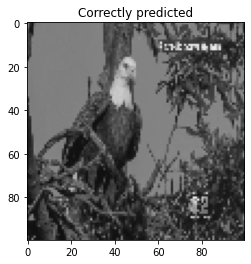

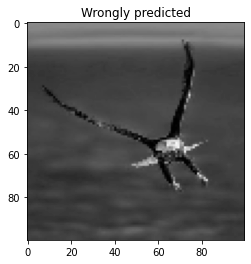

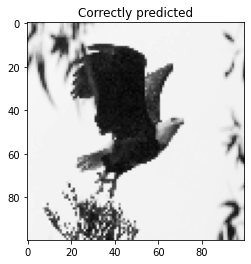

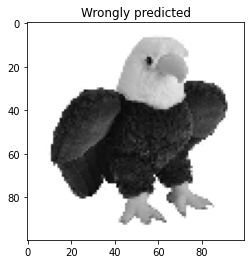

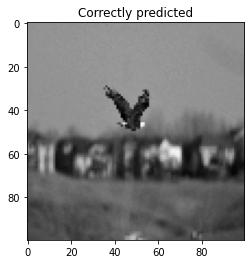

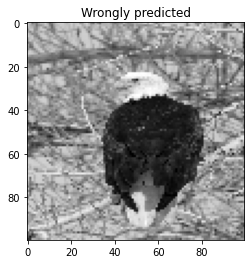

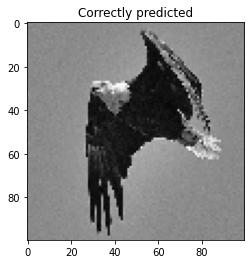

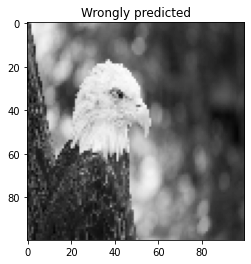

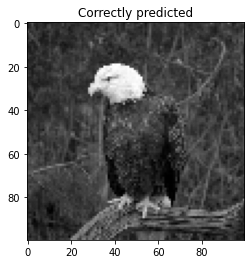

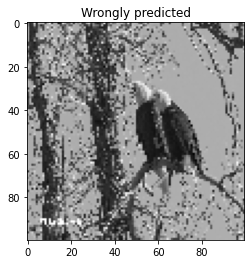

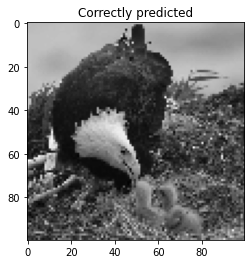

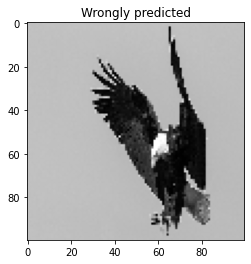

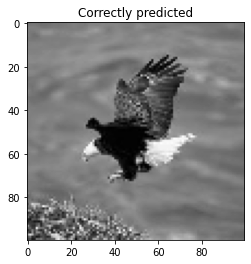

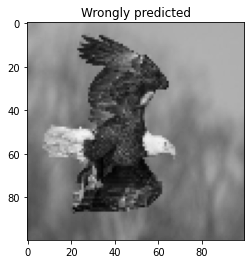

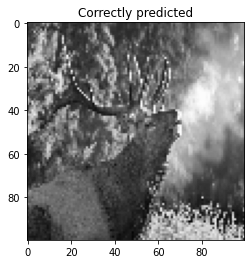

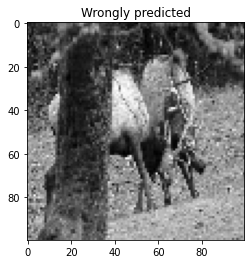

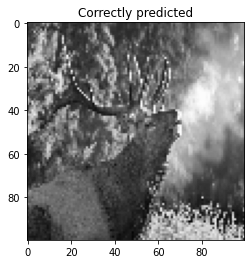

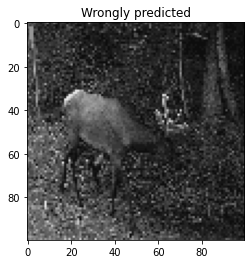

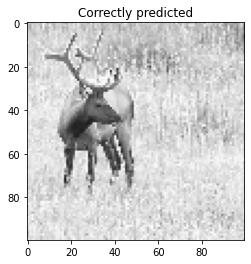

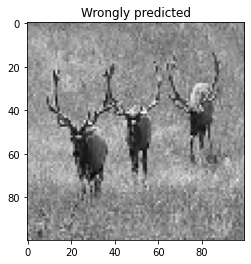

In [42]:
printTestResult(bestModel)

<div style="direction:rtl"> این طور که برداشت می شود عکس هایی به اشتباه تشخیص داده شده اند که حیوان مورد نظر پشتش به تصویر است یا مثلا حالت واقعی خود را ندارد، مثلا عروسکی است و یا ژستی را گرفته که اغلب نمی گیرد. و یا در تصویر خیلی واضح نیفتاده است.</div>

### $phase\ 5$

In [18]:
input = layers.Input(shape=(100, 100, 1))
output = layers.Flatten()(input)
output = layers.Dense(1024, activation='relu')(output)
output = layers.Dense(512, activation = 'relu')(output)
output = layers.Dense(256, activation = 'relu')(output)
output = layers.Dense(2, activation = 'relu')(output)

optimizer= optimizers.SGD(learning_rate=0.01)
prebonusModel = models.Model(inputs=input, outputs=output, name="encoder")
prebonusModel.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy']) 

output = layers.Dense(4, activation= "softmax")(output)
bonusModel = models.Model(inputs=input, outputs=output) 

bonusModel.compile(optimizer = optimizer, loss = "categorical_crossentropy",metrics=["accuracy"])  
hh = bonusModel.fit(trainData, validation_data= trainDataValidation, epochs=20,  batch_size= 32)

Epoch 1/20
43/43 [==============================] - 30s 690ms/step - loss: 1.3868 - accuracy: 0.2627 - val_loss: 1.3858 - val_accuracy: 0.2629
Epoch 2/20
43/43 [==============================] - 22s 523ms/step - loss: 1.3761 - accuracy: 0.2832 - val_loss: 1.3486 - val_accuracy: 0.3368
Epoch 3/20
43/43 [==============================] - 43s 1s/step - loss: 1.3422 - accuracy: 0.3463 - val_loss: 1.3276 - val_accuracy: 0.3694
Epoch 4/20
43/43 [==============================] - 30s 716ms/step - loss: 1.3196 - accuracy: 0.3903 - val_loss: 1.3238 - val_accuracy: 0.3557
Epoch 5/20
43/43 [==============================] - 32s 746ms/step - loss: 1.2985 - accuracy: 0.3955 - val_loss: 1.2786 - val_accuracy: 0.3814
Epoch 6/20
43/43 [==============================] - 27s 622ms/step - loss: 1.2720 - accuracy: 0.3925 - val_loss: 1.2684 - val_accuracy: 0.3918
Epoch 7/20
43/43 [==============================] - 25s 595ms/step - loss: 1.2536 - accuracy: 0.3955 - val_loss: 1.2306 - val_accuracy: 0.3797
Ep

In [27]:
preBunusOutput = prebonusModel.predict(trainDataValidation) 

In [40]:
labels = np.array(trainDataValidation.classes)

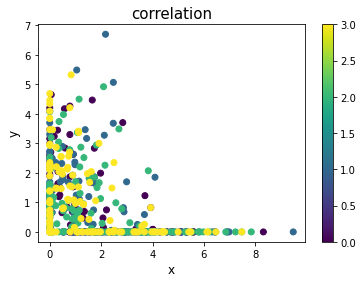

In [41]:
plt.scatter(preBunusOutput[:, 0], preBunusOutput[:, 1], c= labels)
plt.title('correlation', fontsize = 15)
plt.ylabel('y', fontsize = 12)
plt.xlabel('x', fontsize = 12)
plt.colorbar()
plt.show()

<div style="direction:rtl"> در این قسمت هر چه موقعیت نقطه از خط ایکس مساوی ایگرگ دورتر باشد تفکیک داده ها راحتتر انجام می شود.</div>

<div style="direction:rtl"> نتیجه گیری کلی: keras به ما ابزاری قدرتمند جهت پیاده سازی شبکه های عصبی را میدهد. در این شبکه عصبی ما میتوانیم از هایپرپارامترهای مختلف جهت بهبود عملکرد شبکه عصبی خود استفاده بکنیم که در این پروژه مواردی مانند optimizer, epoch, loss function, reguliztion و غیره بررسی شد و تاثیر هر کدام ذکر شد و در آخر شبکه عصبی با بهترین هایپرپارامترها را پیدا کردیم.</div>

<div style="direction:rtl"> پیشنهادات: خیلی پروژه مناسبی بود متشکرم.</div>
<div style="direction:rtl"> اگر کمی قسمت اخر بیشتر توضیح داده می شد بهتر بود</div>

refrences:
https://stackoverflow.com/questions/56482528/what-is-momentum-in-machine-learning/56482857

https://machinelearningmastery.com/understand-the-dynamics-of-learning-rate-on-deep-learning-neural-networks/

https://towardsdatascience.com/why-using-mean-squared-error-mse-cost-function-for-binary-classification-is-a-bad-idea-933089e90df7

https://stats.stackexchange.com/questions/383702/why-do-we-use-multiple-epochs-and-why-does-it-not-lead-to-over-fitting#:~:text=1%20Answer&text=Why%20do%20we%20use%20multiple%20epochs%3F,pass%20over%20the%20training%20data.

https://keras.io/api/layers/regularizers/

https://keras.io/api/callbacks/early_stopping/

https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/


